In [ ]:
lstm

In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras imbalanced-learn gensim optuna transformers biopython
! pip install pandas numpy matplotlib scipy biopython
!pip install numpy pandas scikit-learn tensorflow imbalanced-learn optuna
!pip install pandas numpy scikit-learn keras hyperopt seaborn matplotlib biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez, SeqIO
import pandas as pd

Entrez.email = "your_email@example.com"

# Function to fetch sequences
def fetch_sequences(query, max_sequences, label, organism_type):
    handle = Entrez.esearch(db="nucleotide", term=query, retmax=max_sequences)
    record = Entrez.read(handle)
    ids = record["IdList"]
    labeled_sequences = []

    for id in ids:
        attempt = 1
        while attempt <= 3:
            try:
                handle = Entrez.efetch(db="nucleotide", id=id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(handle, "fasta")
                description_parts = seq_record.description.split(" ")
                if len(description_parts) > 1:
                    gene_name = description_parts[1]
                else:
                    gene_name = "Unknown"
                if any(organism in seq_record.description for organism in ["Homo sapiens", "plant", "bacteria", "fungi"]):
                    labeled_sequences.append((id, str(seq_record.seq), organism_type, gene_name, label))
                break
            except Exception as e:
                print(f"Attempt {attempt} failed for ID: {id}. Error: {e}")
                attempt += 1
        if attempt > 3:
            print(f"Failed to fetch record for ID: {id} after 3 attempts.")

    return labeled_sequences

# Queries for plant, bacteria, fungi, and human genomes
organism_queries = {
    "plant": "plant AND genome",
    "bacteria": "bacteria AND genome",
    "fungi": "fungi AND genome",
    "human": "Homo sapiens AND genome"
}

max_sequences = 50
all_sequences = []

# Fetch sequences for all organism types
for organism, query in organism_queries.items():
    organism_sequences = fetch_sequences(query, max_sequences, None, organism)
    all_sequences.extend(organism_sequences)

# Create a DataFrame
df = pd.DataFrame(all_sequences, columns=["ID", "Sequence", "Organism Type", "Gene Name", "Label"])

# Save to CSV
df.to_csv('dataset_for_taxonomic_categorization.csv', index=False)

# Display the first few rows of the updated DataFrame
df.head()


Attempt 1 failed for ID: 2539954791. Error: No records found in handle
Attempt 2 failed for ID: 2539954791. Error: No records found in handle
Attempt 3 failed for ID: 2539954791. Error: No records found in handle
Failed to fetch record for ID: 2539954791 after 3 attempts.
Attempt 1 failed for ID: 2770170760. Error: No records found in handle
Attempt 2 failed for ID: 2770170760. Error: No records found in handle
Attempt 3 failed for ID: 2770170760. Error: No records found in handle
Failed to fetch record for ID: 2770170760 after 3 attempts.
Attempt 1 failed for ID: 2770168721. Error: No records found in handle
Attempt 2 failed for ID: 2770168721. Error: No records found in handle
Attempt 3 failed for ID: 2770168721. Error: No records found in handle
Failed to fetch record for ID: 2770168721 after 3 attempts.
Attempt 1 failed for ID: 2496685111. Error: No records found in handle
Attempt 2 failed for ID: 2496685111. Error: No records found in handle
Attempt 3 failed for ID: 2496685111. Er

,ID,Sequence,Organism Type,Gene Name,Label


In [ ]:
from Bio import Entrez, SeqIO
import pandas as pd

Entrez.email = "your_email@example.com"

# Function to fetch sequences
def fetch_sequences(query, max_sequences, label, organism_type):
    handle = Entrez.esearch(db="nucleotide", term=query, retmax=max_sequences)
    record = Entrez.read(handle)
    ids = record["IdList"]
    labeled_sequences = []
    failed_ids = []

    for id in ids:
        attempt = 1
        while attempt <= 3:
            try:
                handle = Entrez.efetch(db="nucleotide", id=id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(handle, "fasta")
                description_parts = seq_record.description.split(" ")
                if len(description_parts) > 1:
                    gene_name = description_parts[1]
                else:
                    gene_name = "Unknown"
                if any(organism in seq_record.description for organism in ["Homo sapiens", "plant", "bacteria", "fungi"]):
                    labeled_sequences.append((id, str(seq_record.seq), organism_type, gene_name, label))
                break
            except Exception as e:
                print(f"Attempt {attempt} failed for ID: {id}. Error: {e}")
                attempt += 1
        if attempt > 3:
            print(f"Failed to fetch record for ID: {id} after 3 attempts.")
            failed_ids.append(id)

    return labeled_sequences, failed_ids

# Queries for plant, bacteria, fungi, and human genomes
organism_queries = {
    "plant": "plant AND genome",
    "bacteria": "bacteria AND genome",
    "fungi": "fungi AND genome",
    "human": "Homo sapiens AND genome"
}

max_sequences = 50
all_sequences = []
all_failed_ids = []

# Fetch sequences for all organism types
for organism, query in organism_queries.items():
    organism_sequences, failed_ids = fetch_sequences(query, max_sequences, None, organism)
    all_sequences.extend(organism_sequences)
    all_failed_ids.extend(failed_ids)

# Create a DataFrame
df = pd.DataFrame(all_sequences, columns=["ID", "Sequence", "Organism Type", "Gene Name", "Label"])

# Save to CSV
df.to_csv('dataset_for_taxonomic_categorization.csv', index=False)

# Save failed IDs to a CSV for later inspection
failed_ids_df = pd.DataFrame(all_failed_ids, columns=["Failed IDs"])
failed_ids_df.to_csv('failed_ids.csv', index=False)

# Display the first few rows of the updated DataFrame
df.head()


Attempt 1 failed for ID: 2539954791. Error: No records found in handle
Attempt 2 failed for ID: 2539954791. Error: No records found in handle
Attempt 3 failed for ID: 2539954791. Error: No records found in handle
Failed to fetch record for ID: 2539954791 after 3 attempts.
Attempt 1 failed for ID: 2770170760. Error: No records found in handle
Attempt 2 failed for ID: 2770170760. Error: No records found in handle
Attempt 3 failed for ID: 2770170760. Error: No records found in handle
Failed to fetch record for ID: 2770170760 after 3 attempts.
Attempt 1 failed for ID: 2770168721. Error: No records found in handle
Attempt 2 failed for ID: 2770168721. Error: No records found in handle
Attempt 3 failed for ID: 2770168721. Error: No records found in handle
Failed to fetch record for ID: 2770168721 after 3 attempts.
Attempt 1 failed for ID: 2496685111. Error: No records found in handle
Attempt 2 failed for ID: 2496685111. Error: No records found in handle
Attempt 3 failed for ID: 2496685111. Er

,ID,Sequence,Organism Type,Gene Name,Label


In [ ]:
from Bio import Entrez, SeqIO
import pandas as pd

# Set your email here to identify yourself to NCBI
Entrez.email = "gangonayshiva@gmail.com"

def search_ncbi(term, db="nucleotide", retmax=12):
    """
    Search NCBI for sequences matching the given term.

    Parameters:
    term (str): The search term.
    db (str): The NCBI database to search.
    retmax (int): The maximum number of records to retrieve.

    Returns:
    list: A list of accession IDs.
    """
    handle = Entrez.esearch(db=db, term=term, retmax=retmax)
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

def fetch_sequence(accession_id):
    """
    Fetch a sequence from NCBI using the given accession ID.

    Parameters:
    accession_id (str): The accession ID of the sequence to fetch.

    Returns:
    str: The sequence in FASTA format.
    """
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    sequence_data = handle.read()
    handle.close()
    return sequence_data

# Define search terms for different categories
search_terms = {
    "plants": "txid33090[Organism]",   # NCBI taxonomy ID for plants
    "fungi": "txid4751[Organism]",     # NCBI taxonomy ID for fungi
    "humans": "txid9606[Organism]",    # NCBI taxonomy ID for humans
    "bacteria": "txid2[Organism]"      # NCBI taxonomy ID for bacteria
}

# List to hold the sequence data
sequence_data_list = []

# Fetch and save sequences for each category
for category, term in search_terms.items():
    accession_ids = search_ncbi(term, retmax=5)  # Adjust retmax as needed
    for accession_id in accession_ids:
        sequence = fetch_sequence(accession_id)
        sequence_data_list.append({"Category": category, "Accession ID": accession_id, "Sequence": sequence})
        print(f"Fetched sequence for {category} with Accession ID {accession_id}")

# Create a DataFrame from the sequence data
df = pd.DataFrame(sequence_data_list)

# Save to CSV
df.to_csv('genomic_sequences.csv', index=False)

print("Sequences have been fetched and saved to genomic_sequences.csv.")


Fetched sequence for plants with Accession ID 2770131587
Fetched sequence for plants with Accession ID 2770131581
Fetched sequence for plants with Accession ID 2770125419
Fetched sequence for plants with Accession ID 2770125418
Fetched sequence for plants with Accession ID 2770125417
Fetched sequence for fungi with Accession ID 2756224108
Fetched sequence for fungi with Accession ID 2756224107
Fetched sequence for fungi with Accession ID 2756224106
Fetched sequence for fungi with Accession ID 2756224105
Fetched sequence for fungi with Accession ID 2756224102
Fetched sequence for humans with Accession ID 2770125415
Fetched sequence for humans with Accession ID 2756424878
Fetched sequence for humans with Accession ID 2756424873
Fetched sequence for humans with Accession ID 2756223645
Fetched sequence for humans with Accession ID 2756223643
Fetched sequence for bacteria with Accession ID 2770170760
Fetched sequence for bacteria with Accession ID 2770170759
Fetched sequence for bacteria wi

In [ ]:
from Bio import Entrez, SeqIO
import pandas as pd

# Set your email here to identify yourself to NCBI
Entrez.email = "gangonayshiva@gmail.com"

def search_ncbi(term, db="nucleotide", retmax=30):
    """
    Search NCBI for sequences matching the given term.

    Parameters:
    term (str): The search term.
    db (str): The NCBI database to search.
    retmax (int): The maximum number of records to retrieve.

    Returns:
    list: A list of accession IDs.
    """
    handle = Entrez.esearch(db=db, term=term, retmax=retmax)
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

def fetch_sequence(accession_id):
    """
    Fetch a sequence from NCBI using the given accession ID.

    Parameters:
    accession_id (str): The accession ID of the sequence to fetch.

    Returns:
    str: The sequence in FASTA format.
    """
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    sequence_data = handle.read()
    handle.close()
    return sequence_data

# Define search terms for different categories
search_terms = {
    "plants": "txid33090[Organism]",   # NCBI taxonomy ID for plants
    "fungi": "txid4751[Organism]",     # NCBI taxonomy ID for fungi
    "humans": "txid9606[Organism]",    # NCBI taxonomy ID for humans
    "bacteria": "txid2[Organism]"      # NCBI taxonomy ID for bacteria
}

# List to hold the sequence data
sequence_data_list = []

# Fetch and save sequences for each category
for category, term in search_terms.items():
    accession_ids = search_ncbi(term, retmax=15)  # Adjust retmax to 30 as required
    for accession_id in accession_ids:
        sequence = fetch_sequence(accession_id)
        sequence_data_list.append({"Category": category, "Accession ID": accession_id, "Sequence": sequence})
        print(f"Fetched sequence for {category} with Accession ID {accession_id}")

# Create a DataFrame from the sequence data
df = pd.DataFrame(sequence_data_list)

# Save to CSV
df.to_csv('genomic_sequences.csv', index=False)

print("Sequences have been fetched and saved to genomic_sequences.csv.")


Fetched sequence for plants with Accession ID 2770131587
Fetched sequence for plants with Accession ID 2770131581
Fetched sequence for plants with Accession ID 2770125419
Fetched sequence for plants with Accession ID 2770125418
Fetched sequence for plants with Accession ID 2770125417
Fetched sequence for plants with Accession ID 2770125414
Fetched sequence for plants with Accession ID 2770125413
Fetched sequence for plants with Accession ID 2770125412
Fetched sequence for plants with Accession ID 2770125411
Fetched sequence for plants with Accession ID 2770125410
Fetched sequence for plants with Accession ID 2770125409
Fetched sequence for plants with Accession ID 2770125408
Fetched sequence for plants with Accession ID 2769904811
Fetched sequence for plants with Accession ID 2769904810
Fetched sequence for plants with Accession ID 2769904809
Fetched sequence for fungi with Accession ID 2756224108
Fetched sequence for fungi with Accession ID 2756224107
Fetched sequence for fungi with A

lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load sequences and labels from a CSV file
def load_csv(file_path):
    df = pd.read_csv(file_path)
    return df['sequence'].tolist(), df['label'].tolist()

# Function to sample sequences with a specified segment length and total sample size
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    while len(sampled_sequences) < total_sample_size:
        seq = np.random.choice(sequences)
        if len(seq) >= segment_length:
            start = np.random.randint(0, len(seq) - segment_length + 1)
            sampled_sequences.append(seq[start:start + segment_length])
    return sampled_sequences

# Load sequences and labels from the CSV file
sequences, labels = load_csv('/content/genomic_sequences.csv')

# Define segment length and total sample size
segment_length = 300
total_sample_size = 120  # 30 genomes each for plants, fungi, bacteria, and humans

# Create a DataFrame with sequences and labels
data = pd.DataFrame({
    'sequence': sequences,
    'label': labels
})

# Ensure each category (plant, fungi, bacteria, human) has equal representation
sampled_data = []
for category in data['label'].unique():
    category_sequences = data[data['label'] == category]['sequence'].tolist()
    sampled_category_sequences = sample_sequences(category_sequences, segment_length, total_sample_size // len(data['label'].unique()))
    sampled_data.extend([(seq, category) for seq in sampled_category_sequences])

sampled_data = pd.DataFrame(sampled_data, columns=['sequence', 'label'])

# Label Encoding
label_encoder = LabelEncoder()
sampled_data['label_encoded'] = label_encoder.fit_transform(sampled_data['label'])

# Prepare sequences for LSTM
char_to_int = {char: idx for idx, char in enumerate('ACGT')}
X = np.array([[char_to_int[char] for char in seq] for seq in sampled_data['sequence']])
X = np.expand_dims(X, axis=2)  # LSTM expects input shape of (samples, timesteps, features)

# Encode labels
y = sampled_data['label_encoded'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train.reshape(-1, X_train.shape[1]), y_train)
X_train = np.expand_dims(X_train, axis=2)

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=len(char_to_int), output_dim=64, input_length=segment_length),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.show()

# Evaluate using Confusion Matrix, Classification Report, and ROC AUC Score
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print('Classification Report:')
print(cr)

# ROC AUC Score and ROC Curve
# Note: ROC AUC is typically for binary classification. Here, we handle it for multi-class by calculating ROC AUC for each class vs. rest
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve for class {label_encoder.classes_[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/all_data.csv'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load sequences and labels from a CSV file
def load_csv(file_path):
    df = pd.read_csv(file_path)
    # Check if 'Sequence' is the correct column name; adjust if necessary
    return df['Sequence'].tolist(), df['Category'].tolist()  # Changed 'label' to 'Category'

# Function to sample sequences with a specified segment length and total sample size
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    while len(sampled_sequences) < total_sample_size:
        seq = np.random.choice(sequences)
        if len(seq) >= segment_length:
            start = np.random.randint(0, len(seq) - segment_length + 1)
            sampled_sequences.append(seq[start:start + segment_length])
    return sampled_sequences

# Load sequences and labels from the CSV file
sequences, labels = load_csv('/content/genomic_sequences.csv')

# Define segment length and total sample size
segment_length = 300
total_sample_size = 120  # 30 genomes each for plants, fungi, bacteria, and humans

# Create a DataFrame with sequences and labels
data = pd.DataFrame({
    'sequence': sequences,
    'label': labels
})

# Ensure each category (plant, fungi, bacteria, human) has equal representation
sampled_data = []
for category in data['label'].unique():
    category_sequences = data[data['label'] == category]['sequence'].tolist()
    sampled_category_sequences = sample_sequences(category_sequences, segment_length, total_sample_size // len(data['label'].unique()))
    sampled_data.extend([(seq, category) for seq in sampled_category_sequences])

sampled_data = pd.DataFrame(sampled_data, columns=['sequence', 'label'])

# Label Encoding
label_encoder = LabelEncoder()
sampled_data['label_encoded'] = label_encoder.fit_transform(sampled_data['label'])

# Prepare sequences for LSTM
char_to_int = {char: idx for idx, char in enumerate('ACGT')}
X = np.array([[char_to_int[char] for char in seq] for seq in sampled_data['sequence']])
X = np.expand_dims(X, axis=2)  # LSTM expects input shape of (samples, timesteps, features)

# Encode labels
y = sampled_data['label_encoded'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train.reshape(-1, X_train.shape[1]), y_train)
X_train = np.expand_dims(X_train, axis=2)

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=len(char_to_int), output_dim=64, input_length=segment_length),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.show()

# Plot Validation Accuracy and Loss Separately
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over Time')
plt.show()

# Evaluate using Confusion Matrix, Classification Report, and ROC AUC Score
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print('Classification Report:')
print(cr)

# ROC AUC Score and ROC Curve
# Note: ROC AUC is typically for binary classification. Here, we handle it for multi-class by calculating ROC AUC for each class vs. rest
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve for class {label_encoder.classes_[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-64243c694527>", line 5, in <cell line: 5>
    from tensorflow.keras.models import Sequential
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py", line 48, in <module>
    from tensorflow._api.v2 import __internal__
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/__internal__/__init__.py", line 8, in <module>
    from tensorflow._api.v2.__internal__ import autograph
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/__internal__/autograph/__init__.py", line 9, in <module>
    from tensorflow.python.autograph.impl.api import tf_convert # line: 493
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 27, in <module>
    from tensorflow.python.autograph.converters import asserts

TypeError: object of type 'NoneType' has no len()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture

Epoch 1/50
201/201 [==============================] - 276s 1s/step - loss: 1.2873 - accuracy: 0.3679 - val_loss: 1.2420 - val_accuracy: 0.3989
Epoch 2/50
201/201 [==============================] - 279s 1s/step - loss: 1.2392 - accuracy: 0.4129 - val_loss: 1.1793 - val_accuracy: 0.4661
Epoch 3/50
201/201 [==============================] - 282s 1s/step - loss: 1.3777 - accuracy: 0.2679 - val_loss: 1.3745 - val_accuracy: 0.2626
Epoch 4/50
201/201 [==============================] - 278s 1s/step - loss: 1.3762 - accuracy: 0.2520 - val_loss: 1.3868 - val_accuracy: 0.2390
Epoch 5/50
201/201 [==============================] - 271s 1s/step - loss: 1.3865 - accuracy: 0.2492 - val_loss: 1.3865 - val_accuracy: 0.2390
Epoch 6/50
201/201 [==============================] - 267s 1s/step - loss: 1.3865 - accuracy: 0.2454 - val_loss: 1.3865 - val_accuracy: 0.2390
Epoch 7/50
63/63 [==============================] - 7s 106ms/step - loss: 1.1773 - accuracy: 0.4530
Model Accuracy: 45.30%


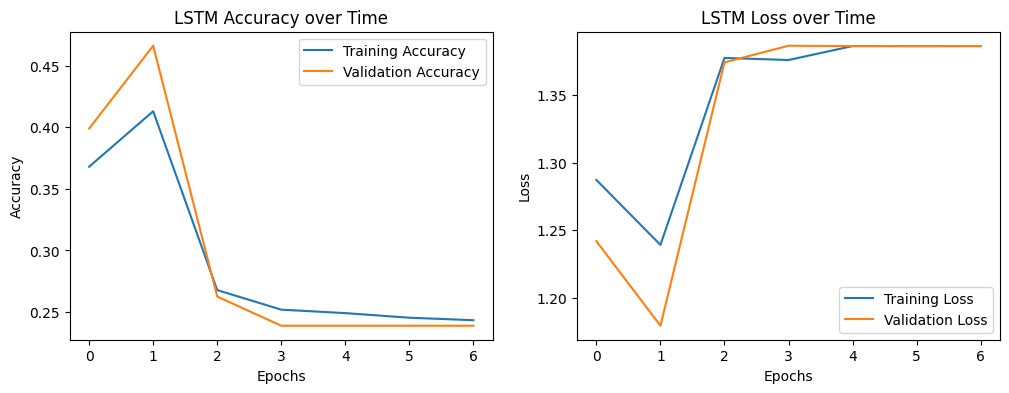

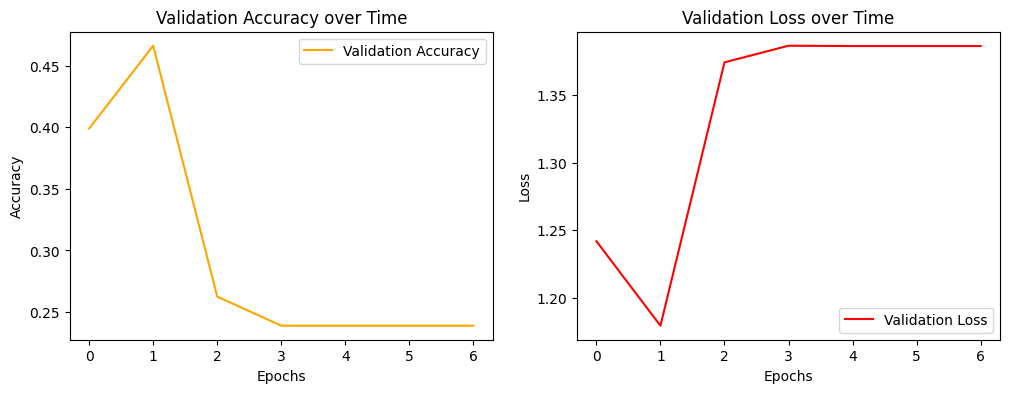

63/63 [==============================] - 5s 82ms/step


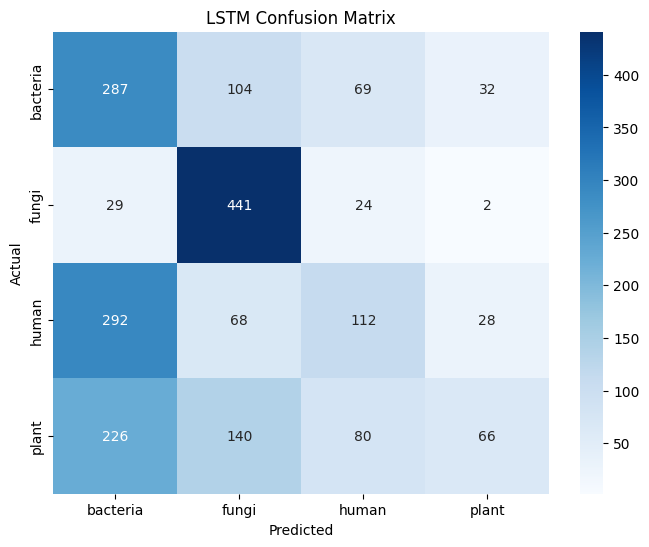

LSTM Classification Report:
              precision    recall  f1-score   support

    bacteria       0.34      0.58      0.43       492
       fungi       0.59      0.89      0.71       496
       human       0.39      0.22      0.29       500
       plant       0.52      0.13      0.21       512

    accuracy                           0.45      2000
   macro avg       0.46      0.46      0.41      2000
weighted avg       0.46      0.45      0.41      2000



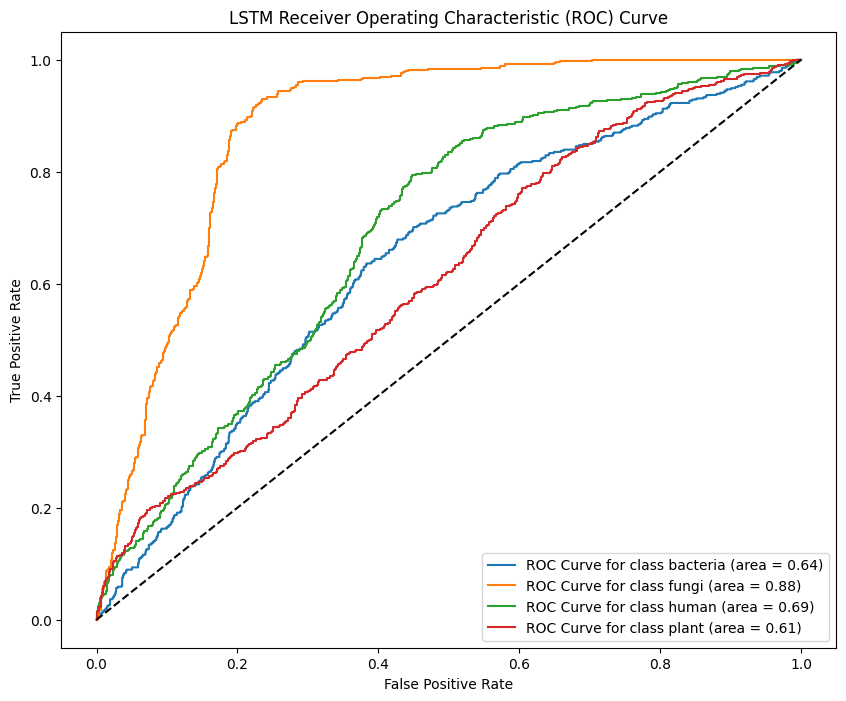

In [ ]:
import numpy as np
import pandas as pd
from Bio import SeqIO
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer, TFBertModel
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load sequences from a FASTA file
def load_fasta(file_path):
    return [str(record.seq) for record in SeqIO.parse(file_path, 'fasta')]

# Function to sample sequences with a specified segment length and total sample size
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    while len(sampled_sequences) < total_sample_size:
        seq = np.random.choice(sequences)
        if len(seq) >= segment_length:
            start = np.random.randint(0, len(seq) - segment_length + 1)
            sampled_sequences.append(seq[start:start + segment_length])
    return sampled_sequences

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load sequences from all FASTA files
def load_all_sequences(paths):
    sequences = []
    for path in paths:
        sequences.extend(load_fasta(path))
    return sequences

# Paths to the downloaded FASTA files for each category
plant_paths = [
    '/content/plants_2746287159.fasta',
    '/content/plants_2746290249.fasta',
    '/content/plants_2746290337.fasta',
    '/content/plants_2746386208.fasta',
    '/content/plants_2746386210.fasta'
]

human_paths = [
    '/content/humans_1779351163.fasta',
    '/content/humans_2303923203.fasta',
    '/content/humans_2744499437.fasta',
    '/content/humans_2744499658.fasta',
    '/content/humans_2746299143.fasta'
]

bacteria_paths = [
    '/content/bacteria_2746390579.fasta',
    '/content/bacteria_2746390585.fasta',
    '/content/bacteria_2746390595.fasta',
    '/content/bacteria_2746390558.fasta',
    '/content/bacteria_2746390560.fasta'
]

fungi_paths = [
    '/content/fungi_2746299064.fasta',
    '/content/fungi_2746299065.fasta',
    '/content/fungi_2746299066.fasta',
    '/content/fungi_2746299067.fasta',
    '/content/fungi_2746388330.fasta'
]

# Define segment length and total sample size
segment_length = 300
total_sample_size = 10000

plant_sequences = load_all_sequences(plant_paths)
human_sequences = load_all_sequences(human_paths)
bacteria_sequences = load_all_sequences(bacteria_paths)
fungi_sequences = load_all_sequences(fungi_paths)

# Sample sequences from each category
sampled_plant_sequences = sample_sequences(plant_sequences, segment_length, total_sample_size // 4)
sampled_human_sequences = sample_sequences(human_sequences, segment_length, total_sample_size // 4)
sampled_bacteria_sequences = sample_sequences(bacteria_sequences, segment_length, total_sample_size // 4)
sampled_fungi_sequences = sample_sequences(fungi_sequences, segment_length, total_sample_size // 4)

# Create a DataFrame with sequences and host labels
data = pd.DataFrame({
    'sequence': (sampled_plant_sequences +
                 sampled_human_sequences +
                 sampled_bacteria_sequences +
                 sampled_fungi_sequences),
    'label': (['plant'] * len(sampled_plant_sequences) +
              ['human'] * len(sampled_human_sequences) +
              ['bacteria'] * len(sampled_bacteria_sequences) +
              ['fungi'] * len(sampled_fungi_sequences))
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Label Encoding
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Prepare sequences for LSTM
char_to_int = {char: idx for idx, char in enumerate('ACGT')}
X = np.array([[char_to_int[char] for char in seq] for seq in data['sequence']])
X = np.expand_dims(X, axis=2)  # LSTM expects input shape of (samples, timesteps, features)

# Encode labels
y = data['label_encoded'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train.reshape(-1, X_train.shape[1]), y_train)
X_train = np.expand_dims(X_train, axis=2)

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=len(char_to_int), output_dim=64, input_length=segment_length),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Accuracy over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Loss over Time')
plt.show()

# Plot Validation Accuracy and Loss Separately
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over Time')
plt.show()

# Evaluate using Confusion Matrix, Classification Report, and ROC AUC Score
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print('LSTM Classification Report:')
print(cr)

# ROC AUC Score and ROC Curve
# Note: ROC AUC is typically for binary classification. Here, we handle it for multi-class by calculating ROC AUC for each class vs. rest
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve for class {label_encoder.classes_[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


rnn

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/50
42/42 [==============================] - 6s 17ms/step - loss: 0.4183 - accuracy: 0.6146 - val_loss: 0.1894 - val_accuracy: 0.8758
Epoch 2/50
42/42 [==============================] - 0s 9ms/step - loss: 0.1869 - accuracy: 0.8649 - val_loss: 0.1484 - val_accuracy: 0.8697
Epoch 3/50
42/42 [==============================] - 0s 8ms/step - loss: 0.1217 - accuracy: 0.9105 - val_loss: 0.1005 - val_accuracy: 0.9242
Epoch 4/50
42/42 [==============================] - 0s 8ms/step - loss: 0.1154 - accuracy: 0.9165 - val_loss: 0.0902 - val_accuracy: 0.9242
Epoch 5/50
42/42 [==============================] - 0s 8ms/step - loss: 0.1047 - accuracy: 0.9203 - val_loss: 0.1116 - val_accuracy: 0.9030
Epoch 6/50
42/42 [==============================] - 0s 9ms/step - loss: 0.0931 - accuracy: 0.9279 - val_loss: 0.0982 - val_accuracy: 0.9121
Epoch 7/50
42/42 [==============================] - 0s 9ms/step - loss: 0.0789 - accuracy: 0.9355 - val_loss: 0.0748 - val_accuracy: 0.9333
Epoch 8/50
42/42 [=

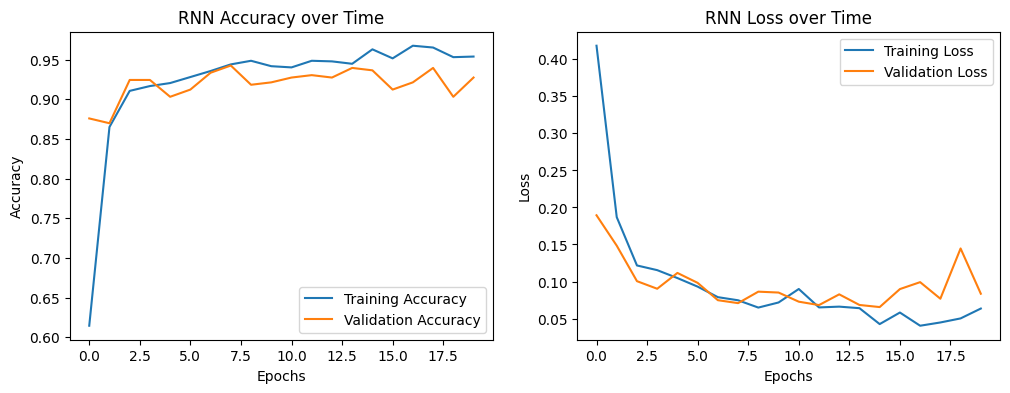

13/13 [==============================] - 0s 2ms/step


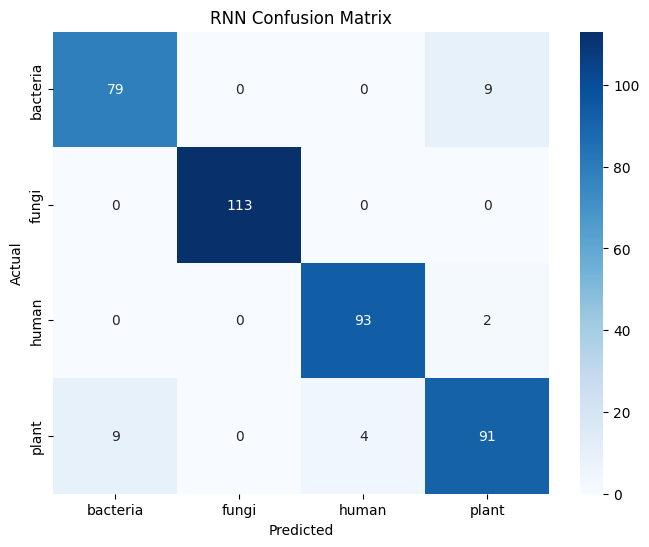

RNN Classification Report:
              precision    recall  f1-score   support

    bacteria       0.90      0.90      0.90        88
       fungi       1.00      1.00      1.00       113
       human       0.96      0.98      0.97        95
       plant       0.89      0.88      0.88       104

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

RNN ROC AUC Score: 0.99


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, SimpleRNN, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Function to load sequences from a FASTA file
def load_fasta(file_path):
    return [str(record.seq) for record in SeqIO.parse(file_path, 'fasta')]

# Function to sample sequences with a specified segment length and total sample size
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    while len(sampled_sequences) < total_sample_size:
        seq = np.random.choice(sequences)
        if len(seq) >= segment_length:
            start = np.random.randint(0, len(seq) - segment_length + 1)
            sampled_sequences.append(seq[start:start + segment_length])
    return sampled_sequences

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Function to calculate GC content
def gc_content(sequence):
    return (sequence.count('G') + sequence.count('C')) / len(sequence)

# Function to calculate k-mer frequencies
def kmer_frequencies(sequence, k=3):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    kmer_freq = {kmer: kmers.count(kmer) for kmer in set(kmers)}
    return kmer_freq

# Function to load sequences from multiple FASTA files
def load_sequences_from_paths(paths):
    sequences = []
    for path in paths:
        sequences.extend(load_fasta(path))
    return sequences

# Paths to the downloaded FASTA files for each category
plant_paths = [
    '/content/plants_2746287159.fasta',
    '/content/plants_2746290249.fasta',
    '/content/plants_2746290337.fasta',
    '/content/plants_2746386208.fasta',
    '/content/plants_2746386210.fasta'
]

human_paths = [
    '/content/humans_1779351163.fasta',
    '/content/humans_2303923203.fasta',
    '/content/humans_2744499437.fasta',
    '/content/humans_2744499658.fasta',
    '/content/humans_2746299143.fasta'
]

bacteria_paths = [
    '/content/bacteria_2746390579.fasta',
    '/content/bacteria_2746390585.fasta',
    '/content/bacteria_2746390595.fasta',
    '/content/bacteria_2746390558.fasta',
    '/content/bacteria_2746390560.fasta'
]

fungi_paths = [
    '/content/fungi_2746299064.fasta',
    '/content/fungi_2746299065.fasta',
    '/content/fungi_2746299066.fasta',
    '/content/fungi_2746299067.fasta',
    '/content/fungi_2746388330.fasta'
]

# Load sequences from each category
plant_sequences = load_sequences_from_paths(plant_paths)
human_sequences = load_sequences_from_paths(human_paths)
bacteria_sequences = load_sequences_from_paths(bacteria_paths)
fungi_sequences = load_sequences_from_paths(fungi_paths)

# Define segment length and total sample size per category
segment_length = 300
total_sample_size_per_category = 2000 // 4

# Sample sequences from each category
sampled_plant_sequences = sample_sequences(plant_sequences, segment_length, total_sample_size_per_category)
sampled_human_sequences = sample_sequences(human_sequences, segment_length, total_sample_size_per_category)
sampled_bacteria_sequences = sample_sequences(bacteria_sequences, segment_length, total_sample_size_per_category)
sampled_fungi_sequences = sample_sequences(fungi_sequences, segment_length, total_sample_size_per_category)

# Create a DataFrame with sequences and host labels
data = pd.DataFrame({
    'sequence': sampled_plant_sequences + sampled_human_sequences + sampled_bacteria_sequences + sampled_fungi_sequences,
    'label': ['plant'] * len(sampled_plant_sequences) + ['human'] * len(sampled_human_sequences) + ['bacteria'] * len(sampled_bacteria_sequences) + ['fungi'] * len(sampled_fungi_sequences)
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Calculate GC content and k-mer frequencies
data['gc_content'] = data['sequence'].apply(gc_content)
kmer_features = pd.DataFrame(data['sequence'].apply(lambda x: kmer_frequencies(x)).tolist()).fillna(0)

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'].apply(lambda x: [x]))

# Reshape BERT embeddings to 2D
bert_embeddings_2d = np.vstack(data['bert_embeddings'].tolist())

# Combine all features
X = np.hstack((bert_embeddings_2d, kmer_features.values, data['gc_content'].values.reshape(-1, 1)))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE on the entire training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the RNN model
def create_rnn_model(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(inputs)
    x = Reshape((1, 128))(x)  # Reshape to (1, 128) to be compatible with RNN layer
    x = SimpleRNN(128, activation='relu', return_sequences=True)(x)
    x = SimpleRNN(64, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(y_train.shape[1], activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = X_train.shape[1]
rnn_model = create_rnn_model(input_shape)

# Train the RNN model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_rnn = rnn_model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the RNN model
rnn_accuracy = rnn_model.evaluate(X_test, y_test)[1]
print(f'RNN Model Accuracy: {rnn_accuracy * 100:.2f}%')

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN Accuracy over Time')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Loss over Time')
plt.show()

# Confusion Matrix, Classification Report, and ROC AUC Score for RNN
y_pred_rnn = rnn_model.predict(X_test)
y_pred_rnn_classes = (y_pred_rnn > 0.5).astype(int)

cm_rnn = confusion_matrix(y_test.argmax(axis=1), y_pred_rnn_classes.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RNN Confusion Matrix')
plt.show()

cr_rnn = classification_report(y_test.argmax(axis=1), y_pred_rnn_classes.argmax(axis=1), target_names=mlb.classes_)
print('RNN Classification Report:')
print(cr_rnn)

roc_auc_rnn = roc_auc_score(y_test, y_pred_rnn, average='macro', multi_class='ovr')
print(f'RNN ROC AUC Score: {roc_auc_rnn:.2f}')
